<a href="https://colab.research.google.com/github/arthurmls/quant-notebooks/blob/main/Moyennes_Mobiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

apple = yf.download('AAPL', start='2021-01-01', end='2024-12-31')
# ça fonctionne même si yfinance renvoie un DataFrame multi-niveaux
apple.columns = apple.columns.droplevel('Ticker')
apple.dropna(inplace=True)
apple.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_4068\1181409013.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple = yf.download('AAPL', start='2021-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2021-01-04,126.239685,130.336789,123.654604,130.248998,143301900
2021-01-05,127.800514,128.512641,125.283717,125.732455,97664900
2021-01-06,123.498512,127.839499,123.283901,124.591077,155088000
2021-01-07,127.712662,128.405274,124.727629,125.215380,109578200
2021-01-08,128.815018,129.380811,127.039597,129.185698,105158200


In [ ]:
apple.rolling??

Signature:
apple.rolling(
    window: 'int | dt.timedelta | str | BaseOffset | BaseIndexer',
    min_periods: 'int | None' = None,
    center: 'bool_t' = False,
    win_type: 'str | None' = None,
    on: 'str | None' = None,
    axis: 'Axis | lib.NoDefault' = <no_default>,
    closed: 'IntervalClosedType | None' = None,
    step: 'int | None' = None,
    method: 'str' = 'single',
) -> 'Window | Rolling'
Docstring:
Provide rolling window calculations.

Parameters
----------
window : int, timedelta, str, offset, or BaseIndexer subclass
    Size of the moving window.

    If an integer, the fixed number of observations used for
    each window.

    If a timedelta, str, or offset, the time period of each window. Each
    window will be a variable sized based on the observations included in
    the time-period. This is only valid for datetimelike indexes.
    To learn more about the offsets & frequency strings, please see `this link
    <https://pandas.pydata.org/pandas-docs/stable/user_gu

In [ ]:
apple["SMA_20"] = apple["Close"].rolling(window=20).mean()
apple["SMA_10"] = apple["Close"].rolling(window=10).mean()
apple["SMA_5"] = apple["Close"].rolling(window=5).mean()

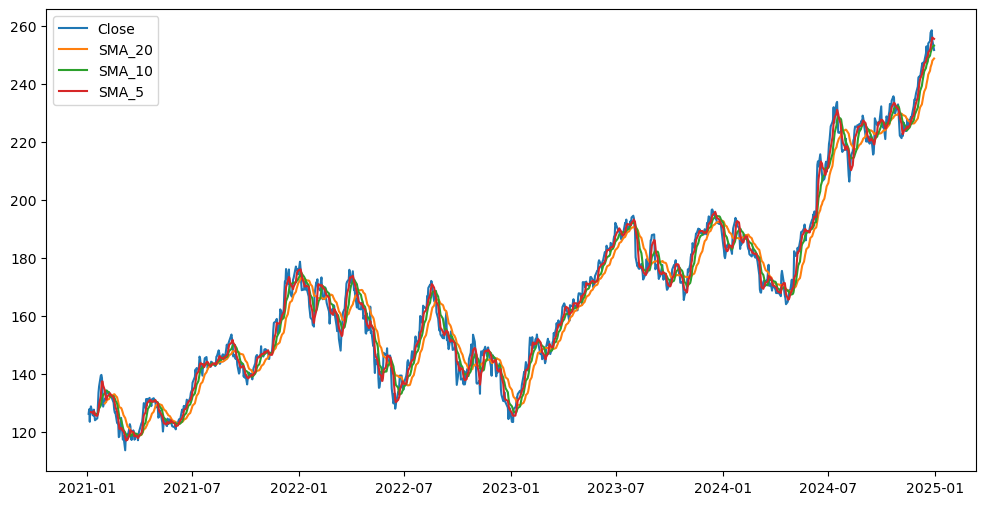

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(apple["Close"], label = "Close")
plt.plot(apple["SMA_20"], label = "SMA_20")
plt.plot(apple["SMA_10"], label = "SMA_10")
plt.plot(apple["SMA_5"], label = "SMA_5")
plt.legend()
plt.show()

In [ ]:
apple.ewm??

Signature:
apple.ewm(
    com: 'float | None' = None,
    span: 'float | None' = None,
    halflife: 'float | TimedeltaConvertibleTypes | None' = None,
    alpha: 'float | None' = None,
    min_periods: 'int | None' = 0,
    adjust: 'bool_t' = True,
    ignore_na: 'bool_t' = False,
    axis: 'Axis | lib.NoDefault' = <no_default>,
    times: 'np.ndarray | DataFrame | Series | None' = None,
    method: "Literal['single', 'table']" = 'single',
) -> 'ExponentialMovingWindow'
Docstring:
Provide exponentially weighted (EW) calculations.

Exactly one of ``com``, ``span``, ``halflife``, or ``alpha`` must be
provided if ``times`` is not provided. If ``times`` is provided,
``halflife`` and one of ``com``, ``span`` or ``alpha`` may be provided.

Parameters
----------
com : float, optional
    Specify decay in terms of center of mass

    :math:`\alpha = 1 / (1 + com)`, for :math:`com \geq 0`.

span : float, optional
    Specify decay in terms of span

    :math:`\alpha = 2 / (span + 1)`, for :mat

In [ ]:
apple["EMA"] = apple["Close"].ewm(alpha=0.55).mean()

In [ ]:
apple.head(25)

Price,Close,High,Low,Open,Volume,SMA_20,SMA_10,SMA_5,EMA
Date,,,,,,,,,
2021-01-04,126.239685,130.336789,123.654604,130.248998,143301900,NaN,NaN,NaN,126.239685
2021-01-05,127.800514,128.512641,125.283717,125.732455,97664900,NaN,NaN,NaN,127.316119
2021-01-06,123.498512,127.839499,123.283901,124.591077,155088000,NaN,NaN,NaN,125.005918
2021-01-07,127.712662,128.405274,124.727629,125.215380,109578200,NaN,NaN,NaN,126.558284
2021-01-08,128.815018,129.380811,127.039597,129.185698,105158200,NaN,NaN,126.813278,127.822822
2021-01-11,125.820229,126.981078,125.351992,126.025091,100384500,NaN,NaN,126.729387,126.712173
2021-01-12,125.644638,126.512834,123.752162,125.351985,91951100,NaN,NaN,126.298212,126.122827
2021-01-13,127.683434,128.229712,125.342235,125.605610,88636800,NaN,NaN,127.135196,126.982606
2021-01-14,125.751945,127.790741,125.605611,127.595643,90221800,NaN,NaN,126.743053,126.305230


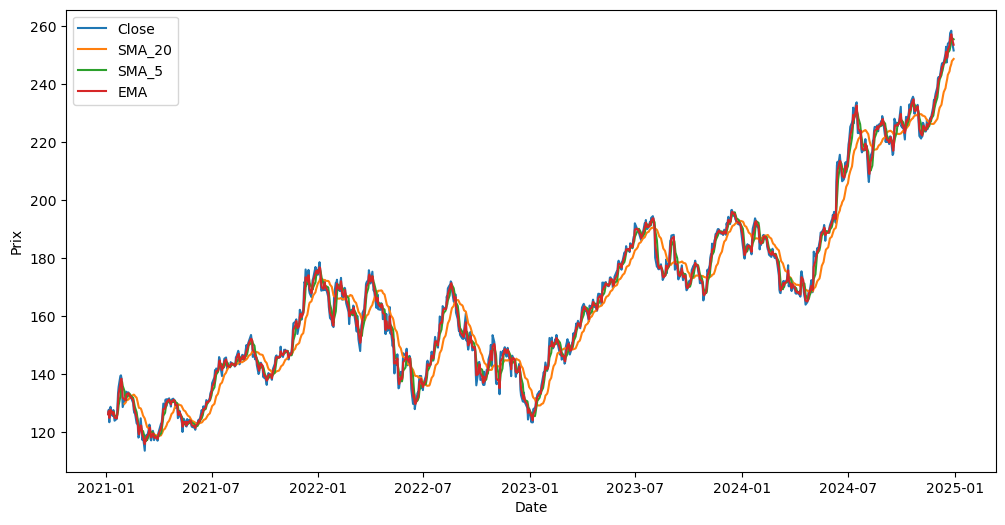

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(apple["Close"], label = "Close")
plt.plot(apple["SMA_20"], label = "SMA_20")
plt.plot(apple["SMA_5"], label = "SMA_5")
plt.plot(apple["EMA"], label = "EMA")
plt.xlabel("Date")
plt.ylabel("Prix")
plt.legend()